# Tasks for laboratory assignment 1

In [3]:
# imports section

import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
from datetime import datetime
import csv
import numpy as np
import matplotlib.pyplot as plt

## Extract webpage data given the url

Create a Python script that performs basic web scraping on a page to extract all the information into text and returns it as a string.
String should not contain tags.

In [4]:
def parse_web_page(url):
    """
    Fetch the content of the given web page.
    """
    try:
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
        }
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')
        
        for script in soup(["script", "style"]):
            script.decompose()
        
        text = soup.get_text(separator=' ', strip=True)

        lines = (line.strip() for line in text.splitlines())
        chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
        text = ' '.join(chunk for chunk in chunks if chunk)
        
        return text
    except requests.exceptions.RequestException as e:
        print(f"Error fetching page: {e}")
        return None
    
# Testing the function
fmi_results = parse_web_page('https://fmi.chnu.edu.ua/')[:255]

if fmi_results:
    print(fmi_results)
else:
    print("Failed to retrieve information for FMI.")

wikipedia_results = parse_web_page('https://en.wikipedia.org/wiki/Web_scraping')[:255]

if wikipedia_results:
    print(wikipedia_results)
else:
    print("Failed to retrieve information for Wikipedia.")

Головна - Факультет математики та інформатики Перейти до основного вмісту [email protected] 58012, Україна, м. Чернівці, вул. Університетська, 28 Новини Всі Загальні Оголошення Події Студенту Викладачу Вітання Діяльність Наукова Конференції Семінари Аспір
Web scraping - Wikipedia Jump to content Main menu Main menu move to sidebar hide Navigation Main page Contents Current events Random article About Wikipedia Contact us Contribute Help Learn to edit Community portal Recent changes Upload file Special page


## Get data from the API

Create a python script that performs basic request to API endpoint and saves that data to a JSON file result.json.

In [5]:
def parse_api(api_url):
    """
    Fetch the data of the given API endpoint and save it to result.json.
    """
    response = requests.get(api_url)
    response.raise_for_status()

    data = response.json()

    with open("result.json", "w", encoding="utf-8") as f:
        json.dump(data, f, indent=4, ensure_ascii=False)


# Tests
parse_api('https://api.github.com/')
print(parse_api('https://catfact.ninja/fact'))

None


## Parse the json file

Parse the `weather.json` file and return weather data for a specific date, that is given as a parameter. Return the data as an array.

In [ ]:
def parse_json(date):
    """
    Parse the data from weather.json file and return weather data for a given date.
    """
    with open("resources/weather.json", "r", encoding="utf-8") as f:
        data = json.load(f)

    for day in data["daily"]:
        if day["date"] == date:
            return list(day.values())

    return []

target_date = '2024-08-19'
print(parse_json(target_date))

['2024-08-19', 30.0, 21.0, 5.0, 10.0, 70, 'Light rain']


## Parse the csv file

Parse the `weather.csv` file and return weather data for a specific date, that is given as a parameter. Return the data as an array.

In [7]:
def parse_csv(date):
    """
    Parse the data from weather.csv file and return weather data for a given date.
    """
    with open('resources/weather.csv', 'r') as file:
        reader = csv.DictReader(file)
        print(reader.fieldnames)
        weather_data = [row for row in reader if row['CET'] == date]
        return weather_data

# Testing the function
target_date = '1997-1-2'  # Use a valid date from the CSV file
print(parse_csv(target_date))

['CET', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC', 'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity', ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressurehPa', ' Mean Sea Level PressurehPa', ' Min Sea Level PressurehPa', ' Max VisibilityKm', ' Mean VisibilityKm', ' Min VisibilitykM', ' Max Wind SpeedKm/h', ' Mean Wind SpeedKm/h', ' Max Gust SpeedKm/h', 'Precipitationmm', ' CloudCover', ' Events', 'WindDirDegrees']
[{'CET': '1997-1-2', 'Max TemperatureC': '7', 'Mean TemperatureC': '3', 'Min TemperatureC': '0', 'Dew PointC': '6', 'MeanDew PointC': '3', 'Min DewpointC': '0', 'Max Humidity': '100', ' Mean Humidity': '92', ' Min Humidity': '71', ' Max Sea Level PressurehPa': '1007', ' Mean Sea Level PressurehPa': '1003', ' Min Sea Level PressurehPa': '997', ' Max VisibilityKm': '10', ' Mean VisibilityKm': '9', ' Min VisibilitykM': '4', ' Max Wind SpeedKm/h': '26', ' Mean Wind SpeedKm/h': '8', ' Max Gust SpeedKm/h': '47', 'Precipitationmm': '0.00', ' Cl

## Visualize data

Visualize the `weather.csv` data using matplotlib. Choose your own approach to data visualization. Save the results (as `.png`, `.webp` files etc., your choise) in this repository. 

Index(['CET', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC',
       'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressurehPa',
       ' Mean Sea Level PressurehPa', ' Min Sea Level PressurehPa',
       ' Max VisibilityKm', ' Mean VisibilityKm', ' Min VisibilitykM',
       ' Max Wind SpeedKm/h', ' Mean Wind SpeedKm/h', ' Max Gust SpeedKm/h',
       'Precipitationmm', ' CloudCover', ' Events', 'WindDirDegrees'],
      dtype='object')


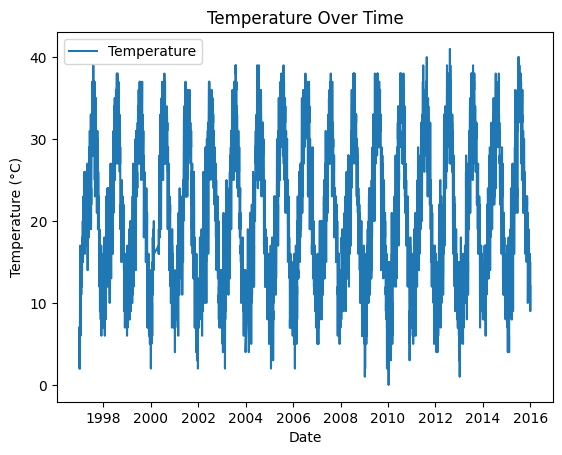

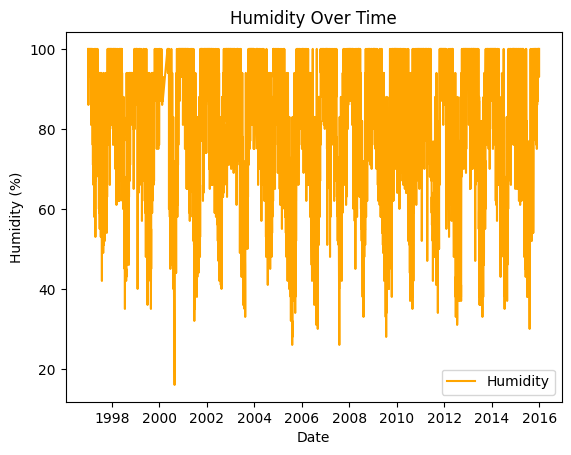

In [ ]:
def visualize_data():
    """
    Parse the data from weather.csv file and visualize it using Matplotlib.

    Args:
        None: None.
    Returns:
        None: None.
    """
    df = pd.read_csv('resources/weather.csv')

    print(df.columns) 

    df['date'] = pd.to_datetime(df['CET']) 
    plt.plot(df['date'], df['Max TemperatureC'], label='Temperature')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.title('Temperature Over Time')
    plt.legend()
    plt.savefig('temperature_plot.png')

    plt.figure()
    plt.plot(df['date'], df['Max Humidity'], label='Humidity', color='orange')
    plt.xlabel('Date')
    plt.ylabel('Humidity (%)')
    plt.title('Humidity Over Time')
    plt.legend()
    plt.savefig('humidity_plot.png')

visualize_data()